In [1]:
import pandas as pd

%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("dataset/movies_metadata.csv")
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
4,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0


In [3]:
data.shape

(9048, 24)

In [4]:
def get_genres(x):
    genre = []
    if isinstance(x,list):
        for i in x:
            genre.append(i['name'])
    return genre

In [5]:
from ast import literal_eval
data['genres'] = data['genres'].apply(literal_eval).apply(get_genres)

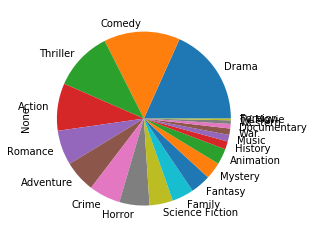

In [6]:
genres = data['genres'].apply(pd.Series).stack().value_counts()
genres.plot.pie()

In [7]:
count = data['vote_count'].sum()
rating = data['vote_average']*data['vote_count']
rate = rating.sum()
C = rate/count
print(C)

6.736226082192209


In [8]:
def get_top():
    m = 500
    top = data[data['vote_count'] > 500]
    top = top[['title','release_date','genres','vote_count','vote_average']]
    top['rating'] = (top['vote_count']/(top['vote_count']+m))*top['vote_average']+(m/(top['vote_count']+m))*C
    top = top.sort_values(by=['rating'], ascending=False)
    return top

In [9]:
get_top().head(10)

,title,release_date,genres,vote_count,vote_average,rating
169,The Shawshank Redemption,1994-09-23,"[Drama, Crime]",8358.0,8.5,8.400442
407,The Godfather,1972-03-14,"[Drama, Crime]",6024.0,8.5,8.364824
4725,The Dark Knight,2008-07-16,"[Drama, Action, Crime, Thriller]",12269.0,8.3,8.238767
1501,Fight Club,1999-10-15,[Drama],9678.0,8.3,8.223179
158,Pulp Fiction,1994-09-10,"[Thriller, Crime]",8670.0,8.3,8.214734
285,Schindler's List,1993-11-29,"[Drama, History, War]",4436.0,8.3,8.141595
7099,Whiplash,2014-10-10,[Drama],4376.0,8.3,8.139646
2635,Spirited Away,2001-07-20,"[Fantasy, Adventure, Animation, Family]",3968.0,8.3,8.125003
191,Forrest Gump,1994-07-06,"[Comedy, Drama, Romance]",8147.0,8.2,8.115359
1153,Life Is Beautiful,1997-12-20,"[Comedy, Drama]",3643.0,8.3,8.111275


In [10]:
def top_list(genre):
    top = data[data['genres'].apply(lambda x: genre in x)]
    top = top[['title','release_date','vote_count','vote_average']]
    top = top.sort_values(by='vote_count', ascending = False)
    top = top[:50]
    m = top['vote_count'].min()
    top['rating'] = (top['vote_count']/(top['vote_count']+m))*top['vote_average']+(m/(top['vote_count']+m))*C
    top = top.sort_values(by=['rating'], ascending=False)
    return top

In [11]:
top_list('Action').head(10)

,title,release_date,vote_count,vote_average,rating
4725,The Dark Knight,2008-07-16,12269.0,8.3,7.828882
5467,Inception,2010-07-14,14075.0,8.1,7.727453
3145,The Lord of the Rings: The Return of the King,2003-12-01,8226.0,8.1,7.566235
2415,The Lord of the Rings: The Fellowship of the Ring,2001-12-18,8892.0,8.0,7.528602
570,The Empire Strikes Back,1980-05-17,5998.0,8.2,7.514018
141,Star Wars,1977-05-25,6778.0,8.1,7.502191
7114,Guardians of the Galaxy,2014-07-30,10014.0,7.9,7.497728
2735,The Lord of the Rings: The Two Towers,2002-12-18,7641.0,8.0,7.482997
1308,The Matrix,1999-03-30,9079.0,7.9,7.471552
5059,Inglourious Basterds,2009-08-18,6598.0,7.9,7.382136


In [12]:
top_list('Crime').head(10)

,title,release_date,vote_count,vote_average,rating
169,The Shawshank Redemption,1994-09-23,8358.0,8.5,8.059413
4725,The Dark Knight,2008-07-16,12269.0,8.3,8.010870
407,The Godfather,1972-03-14,6024.0,8.5,7.942650
158,Pulp Fiction,1994-09-10,8670.0,8.3,7.920014
34,Se7en,1995-09-22,5915.0,8.1,7.663649
157,Leon: The Professional,1994-09-14,4293.0,8.2,7.624296
1596,The Green Mile,1999-12-10,4166.0,8.2,7.613774
594,The Godfather: Part II,1974-12-20,3418.0,8.3,7.598180
320,The Silence of the Lambs,1991-02-01,4549.0,8.1,7.582354
6787,The Wolf of Wall Street,2013-12-25,6768.0,7.9,7.560896


In [13]:
top_list('Documentary').head(10)

,title,release_date,vote_count,vote_average,rating
8526,Planet Earth,2006-12-10,176.0,8.8,7.885670
7358,Citizenfour,2014-10-10,516.0,7.9,7.651634
5713,Senna,2010-10-07,282.0,8.1,7.647563
6663,Blackfish,2013-06-07,456.0,7.9,7.626630
4965,Dear Zachary: A Letter to a Son About His Father,2008-10-31,146.0,8.4,7.585565
6228,Searching for Sugar Man,2012-06-30,286.0,7.9,7.517539
6687,One Direction: This Is Us,2013-08-28,209.0,8.0,7.493042
7023,Jodorowsky's Dune,2013-08-30,172.0,8.1,7.488050
5196,The Cove,2009-07-31,241.0,7.9,7.472367
4547,The King of Kong,2007-08-17,148.0,8.1,7.437054
